In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import csv
import matplotlib.pyplot as plt
from sklearn import linear_model

sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')

In 2011, the film “Moneyball” was released. The film — adapted from the book by Micheal Lewis, is based on a true story, and follows Oakland A’s general manager Billy Beane, who, after losing his star players, must find a way to reach the playoffs whilst faced with a tight budget. Enter Paul DePodesta, an Ivy League graduate, who, using Sabermetrics, is able to identify the ‘bargain’ players in order to build the team that go on the A’s notorious 20 game win streak and see them finishing 1st in the regular season, throwing the art of sabermetrics into the limelight.


#Linear Regression
Linear Regression is one of the simplest forms of supervised machine learning which models a target prediction value (usually denoted by y) based on independent variables (usually denoted by X).


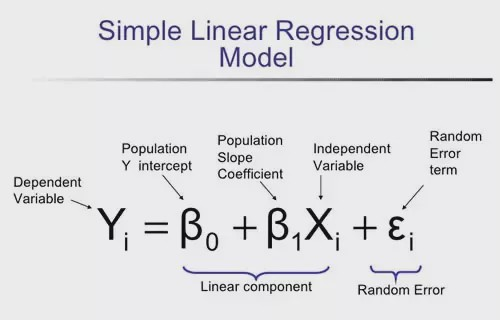

*   Y — The dependent variable (Target prediction value)
*   X — Independent variable(s)
*   β — Regression coefficients: These refer to the relationship between the x variable and the dependent variable y.
*   ε — Error term: used to denote the a residual variable produced by a statistical or mathematical model, which is created when the model does not fully represent the actual relationship between the independent variables and the dependent variables. As a result of this incomplete relationship, the error term is the amount at which the equation may differ during empirical analysis.

The job of a linear regression model is essentially to find a linear relationship between the input (X) and output (y).


The main attributes that we need to be concerned with are:

*   RS — Runs Scored
*   RA — Runs Allowed
*   W — Wins
*   OBP — On Base Percentage
*   SLG — Slugging Percentage
*   BA — Batting Average
*   Playoffs — Whether a team made it to playoffs or not
*   OOBP — Opponent’s On Base Percentage
*   OSLG — Opponents Slugging Percentage



Some of these are fairly self explanatory, however there are a few attributes that require some explaining:

OBP — On Base Percentage: This is a statistic measuring how frequently a batter reaches base, it does not take into account how far the batter runs i.e. third base.

SLG — Slugging Percentage: A measure of the batting ‘Productivity’, in simple terms, it measures how far a batter makes it when they hit the ball.

BA — Batting Average: Defined by the number of hits divided by at bats, measures how likely a batter is to hit a ball when pitched. Again, does not take into account how far the batter runs.

Now, all three of these statistics are extremely important in this analysis. Pre-’Moneyball’, scouts mainly used Batting Average as a gauge of a good batter, and often a players BA would have a huge impact on their value/salary. However, DePodesta saw this as a mistake, claiming that scouts overvalued BA as a statistic, and massively undervalued OBP and SLG as a measure of a good batter. Billy Beane and the A’s were then able to obtain players with high OBP and SLG at bargain prices, because the scouts overlooked these attributes.



In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/tleitch/BDML/main/data/baseball.csv')
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


#Data Wrangling
Let us add a new column; RD, which shows the difference between RS(Runs Scored), and RA(Runs Allowed). 

df['RD'] = df['RS'] - df['RA']


In [ ]:
df['RD'] = df['RS'] - df['RA']


Let’s also make sure we only have pre-’Moneyball’ data, this can be done by only including data from before the 2002 regular season. df = df[df.Year < 2002]

In [ ]:
df = df[df.Year < 2002]

And here we add our dependent variable, whether or not the team made the playoffs. We put a 1 in for made pplayoffs, and 0 for didn't. This should be familiar dependent variable to you from logistic regression

In [ ]:
mbplayoffs = df[df.Playoffs == 1]

In [ ]:
mbnoplayoffs = df[df.Playoffs == 0]

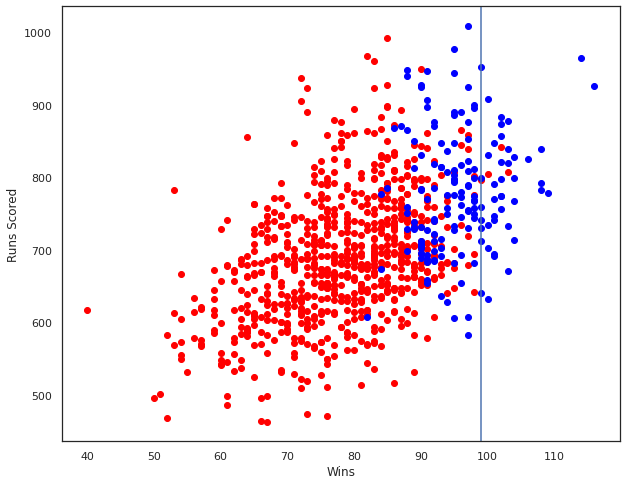

In [ ]:
# Plotting scatterplot
plt.figure(figsize=(10,8))
plt.scatter(x=mbnoplayoffs.W,y = mbnoplayoffs.RS,c="red")
plt.scatter(x=mbplayoffs.W,y = mbplayoffs.RS,c="blue")
plt.xlabel("Wins")
plt.ylabel("Runs Scored")
plt.axvline(x = 99)

#EDA

According to DePodesta, the A’s needed 99 wins in the regular season in order to make playoffs. We can create a plot to visualise this using Seaborn, which is a data visualisation library based on matplotlib.

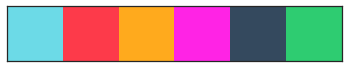

In [ ]:
flatui = ["#6cdae7", "#fd3a4a", "#ffaa1d", "#ff23e5", "#34495e", "#2ecc71"]
sns.set_palette(flatui)
sns.palplot(sns.color_palette())

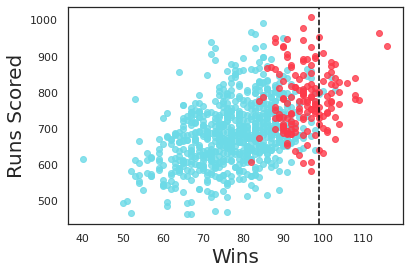

In [ ]:
sns.regplot(x = mbnoplayoffs["W"], y = mbnoplayoffs["RS"], fit_reg = False)
sns.regplot(x = mbplayoffs["W"], y = mbplayoffs["RS"], fit_reg = False)
plt.xlabel("Wins", fontsize = 20)
plt.ylabel("Runs Scored", fontsize = 20)
plt.axvline(99, 0, 1, color = "Black", ls = '--')
plt.show()

As we can see, DePodestas theory seems accurate, as there has only ever been 3 instances where a team has not made playoffs with ≥ 99 wins (seen in the blue dots past the dashed black 99 wins ‘threshold’ line).
DePodesta also calculated that in order to win 99 games and make it to the playoffs, the A’s would have to score 814 runs, whilst allowing just 645, a run differential of 169. We can use many different methods to visualise the relationship between Run Difference and Wins, and we will use two of them.


Firstly, a simple scatterplot:

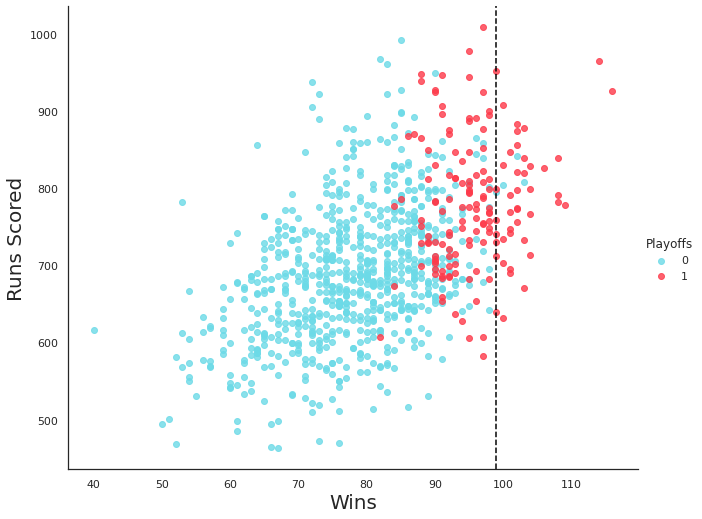

In [ ]:
sns.lmplot(x = "W", y = "RS", fit_reg = False, hue = "Playoffs", data=df,height=7, aspect=1.25)
plt.xlabel("Wins", fontsize = 20)
plt.ylabel("Runs Scored", fontsize = 20)
plt.axvline(99, 0, 1, color = "Black", ls = '--')
plt.show()

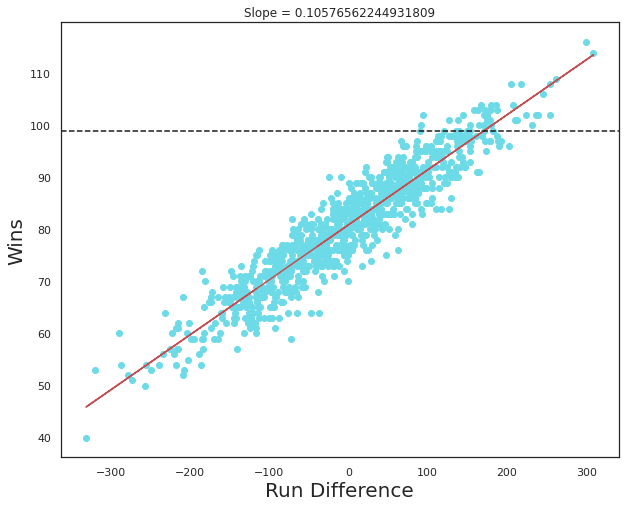

In [ ]:
x = np.array(df.RD)
y = np.array(df.W)
slope, intercept = np.polyfit(x, y, 1)
abline_values = [slope * i + intercept for i in x]
plt.figure(figsize=(10,8))
plt.scatter(x, y)
plt.plot(x, abline_values, 'r')
plt.title("Slope = %s" % (slope), fontsize = 12)
plt.xlabel("Run Difference", fontsize =20)
plt.ylabel("Wins", fontsize = 20)
plt.axhline(99, 0, 1, color = "k", ls = '--')
plt.show()

Secondly: We can use the Seaborn pairplot:

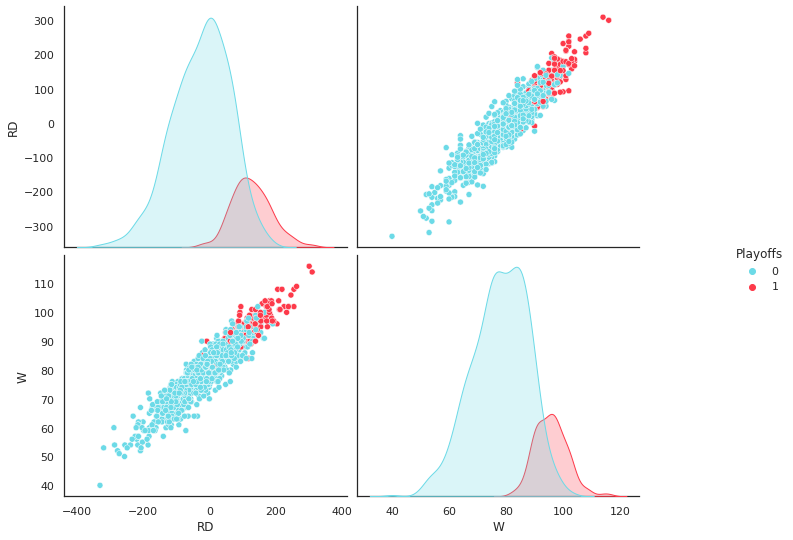

In [ ]:
corrcheck = df[['RD', 'W', 'Playoffs']].copy()
g = sns.pairplot(corrcheck, hue = 'Playoffs',vars=["RD", "W"])
g.fig.set_size_inches(12,8)

We can already see that there is a clear linear relationship between the two, however, we can further verify this by using Pandas .corr(), which computes the pairwise correlation between columns.

In [ ]:
corrcheck.corr(method='pearson')

,RD,W,Playoffs
RD,1.000000,0.938515,0.566274
W,0.938515,1.000000,0.588978
Playoffs,0.566274,0.588978,1.000000


We can see a correlation of 0.938515 between Wins and Run Difference, indicating an extremely strong relationship.
Now we know that Run Difference correlates so strongly with Wins, what attributes correlate strongly with Run Difference? As we previously mentioned, Scouts at the time relied heavily on Batting Average, and, according to DePodesta, undervalued On Base Percentage and Slugging Percentage. Again we can use the .corr() Pandas function, to compute the pairwise correlation between columns.

In [ ]:
podesta = df[['OBP','SLG','BA','RS']]
podesta.corr(method='pearson')

,OBP,SLG,BA,RS
OBP,1.000000,0.806154,0.854055,0.904909
SLG,0.806154,1.000000,0.814068,0.926384
BA,0.854055,0.814068,1.000000,0.831625
RS,0.904909,0.926384,0.831625,1.000000


In [ ]:
moneyball = df.dropna()

In [ ]:
moneyball.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
331,ARI,NL,2001,818,677,92,0.341,0.442,0.267,1,5.0,1.0,162,0.311,0.404,141
332,ATL,NL,2001,729,643,88,0.324,0.412,0.260,1,7.0,3.0,162,0.314,0.384,86
338,CLE,AL,2001,897,821,91,0.350,0.458,0.278,1,6.0,4.0,162,0.341,0.417,76
342,HOU,NL,2001,847,769,93,0.347,0.451,0.271,1,4.0,4.0,162,0.325,0.437,78
349,NYY,AL,2001,804,713,95,0.334,0.435,0.267,1,3.0,2.0,161,0.318,0.398,91


Note the right hand column here, which shows RS’s relationship with OBP, SLG, and BA. We can see that Batting Average is actually the least correlated attribute in respect to Runs Scored, with a correlation of 0.83. Slugging Percentage and On Base Percentage are actually correlated more highly, with 0.93 and 0.90, respectively. This confirms DePodestas idea of the undervalue placed on SLG and OBP and the relative overvaluing of BA.
We can actually apply a bit of machine learning to further verify these claims. Firstly, by using univariate selection, to select those features that have the strongest relationship with the output variable(RD in this case). The scikit-learn library provides the SelectKBest class that allows us to pick a specific number of features. We will use the chi-squared statistical test for non-negative features to select the best features from our dataset. Firstly we need to use moneyball = df.dropna() to remove any null values from our dataset that would interfere with machine learning methods.
Then:

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#we use RD as the target column
X = moneyball.iloc[:,6:9] 
y = moneyball.iloc[:,-1] 
#apply SelectKBest class to get best features
bestfeatures = SelectKBest(score_func=chi2, k=3)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']
print(featureScores.nlargest(3,'Score')) 

  Feature     Score
1     SLG  0.008951
0     OBP  0.006262
2      BA  0.004577


Another method is to use feature importance that comes inbuilt with Tree Based Classifiers. Feature importance will give a score for each feature of the data, the higher the score, the more important or relevant the feature is towards the output variable.

[0.31307268 0.36857504 0.31835228]


Text(0, 0.5, 'Statistic')

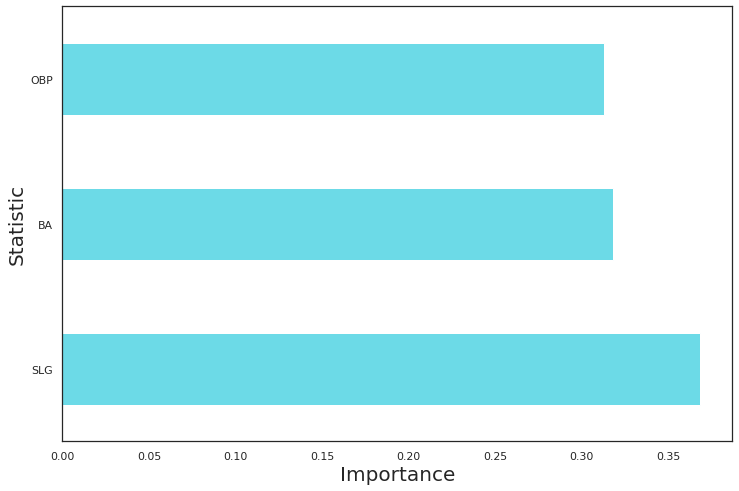

In [ ]:
X = moneyball.iloc[:,6:9]  #independent columns
y = moneyball.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(3).plot(kind='barh', figsize = (12,8))
plt.xlabel("Importance", fontsize = 20)
plt.ylabel("Statistic", fontsize = 20)

#Model Building
Scikit-learn provides the functionality for us to build our linear regression models. First of all, we build a model for Runs Scored, predicted using On Base Percentage and Slugging Percentage.

In [ ]:
x = df[['OBP','SLG']].values
y = df[['RS']].values
Runs = linear_model.LinearRegression()
Runs.fit(x,y)

print(Runs.intercept_)
print(Runs.coef_)

[-804.62706106]
[[2737.76802227 1584.90860546]]


In [ ]:
x = moneyball[['OOBP','OSLG']].values
y = moneyball[['RA']].values
RunsAllowed = linear_model.LinearRegression()
RunsAllowed.fit(x,y)

print(RunsAllowed.intercept_)
print(RunsAllowed.coef_)

[-775.16234861]
[[3225.00378812 1106.50390975]]


We can then say that our Runs Scored model takes the form:
RS = -804.627 + (2737.768×(OBP)) + (1584.909×(SLG))
Next, we do the same but for modelling Runs Allowed, using Opponents On Base Percentage and Opponents Slugging Percentage.


In [ ]:
x = moneyball[['RD']].values
y = moneyball[['W']].values
Wins = linear_model.LinearRegression()
Wins.fit(x,y)

print(Wins.intercept_)
print(Wins.coef_)

[84.09190385]
[[0.08469339]]


We can say that our Wins model takes the form:
W = 84.092 + (0.085 ×(RD))
Now all we have left to do is get OBP, SLG, OOBP, OSLG, and simply plug them into the models!
We know which players were transferred in and out after the 2001 season, so we can take 2001 player statistics to build the A’s new 2002 team.
The A’s 2002 team pre-season statistics taken from 2001:
OBP: 0.339
SLG: 0.430
OOBP: 0.307
OSLG: 0.373
Now lets create our predictions:

In [ ]:
# Prediction for runs scored.
Runs.predict([[0.339,0.430]])

array([[804.98699884]])

In [ ]:
# Predictions for runs allowed.
RunsAllowed.predict([[0.307,0.373]])

array([[627.63977268]])

Meaning we get a RD of 177 (805–628), which we can then plug into our Wins model.

In [ ]:
Wins.predict([[177]])

array([[99.08263325]])

So, in the end, our model predicted 805 Runs Scored, 628 Runs Allowed, and 99 games won, meaning that our model predicted that the A’s would make the playoffs given their team statistics, which they did!
